In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
#Read in Cleaned CVS
CleanData_df=pd.read_csv('cleaned_data.csv')
CleanData_df.head()

,Unnamed: 0,Country,Water Body ID,Year,Unit of Measure,Value,Population Density,GDP
0,13,France,FRGR0005B,2009,[pH],7.68919,122.299437,2.806036e+12
1,16,France,FRGR1496,2009,mg{O2}/L,1.06250,122.299437,2.806036e+12
2,18,France,FRGR0004A,2009,[pH],7.63017,122.299437,2.806036e+12
3,29,France,FRDR173A,2009,mg{O2}/L,1.10833,122.299437,2.806036e+12
4,31,France,FRGR0173,2009,mg{O2}/L,1.76667,122.299437,2.806036e+12


In [3]:
CleanData_df.count()

Unnamed: 0            3641
Country               3641
Water Body ID         3641
Year                  3641
Unit of Measure       3641
Value                 3641
Population Density    3641
GDP                   3641
dtype: int64

In [4]:
# Function to create Linear Regression plots
def LinReg(x_data, y_data, annotate_position):
    slope, intercept, r, p, std_err=st.linregress(x_data, y_data)
    fit=slope*x_axis+intercept
    plt.plot(x_data, fit, '--', color='red', )
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(annotate_position),fontsize=15,color="red")
    print(f'The r-value is:{r}')

In [5]:
#Create DF of Stats for pH
pH = CleanData_df['Unit of Measure'] == '[pH]'

pH_Stats = CleanData_df[pH].groupby(['Country', 'Year', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
pH_Stats.columns = ['Country', 'Year', 'GDP', 'Population Density', 'Mean pH', 'Median pH', 
                    'pH Variance', 'pH Std. Dev.', 'pH Std. Err.']
pH_Stats.head()


,Country,Year,GDP,Population Density,Mean pH,Median pH,pH Variance,pH Std. Dev.,pH Std. Err.
0,Austria,2009,4.200405e+11,107.127967,8.383330,8.38333,NaN,NaN,NaN
1,Austria,2010,4.200405e+11,107.127967,8.060000,8.06000,NaN,NaN,NaN
2,Belgium,2008,5.151026e+11,377.379590,8.035630,8.03563,NaN,NaN,NaN
3,Belgium,2009,5.151026e+11,377.379590,7.756266,7.78000,0.049383,0.222223,0.053897
4,Bulgaria,2009,5.679241e+10,64.711100,7.929818,7.90550,0.036539,0.191151,0.040754


In [6]:
#Create DF of Stats for pH - all years combined for each country
pH = CleanData_df['Unit of Measure'] == '[pH]'

Country_pH_Stats = CleanData_df[pH].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_pH_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean pH', 'Median pH', 
                    'pH Variance', 'pH Std. Dev.', 'pH Std. Err.']
Country_pH_Stats


,Country,GDP,Population Density,Mean pH,Median pH,pH Variance,pH Std. Dev.,pH Std. Err.
0,Austria,4.200405e+11,107.127967,8.221665,8.221665,0.052271,0.228629,0.161665
1,Belgium,5.151026e+11,377.379590,7.771786,7.804650,0.050814,0.225419,0.053132
2,Bulgaria,5.679241e+10,64.711100,7.954444,7.941500,0.036645,0.191428,0.033840
3,Croatia,6.109527e+10,73.049375,7.900000,7.900000,NaN,NaN,NaN
4,Finland,2.526922e+11,18.148547,6.745819,6.794100,0.173389,0.416400,0.074788
5,France,2.806036e+12,122.299437,7.751359,7.865360,0.148905,0.385882,0.018130
6,Germany,3.781699e+12,237.307597,7.827198,7.871165,0.086703,0.294453,0.042501
7,Ireland,3.323614e+11,70.653448,7.266670,7.266670,NaN,NaN,NaN
8,Italy,2.080645e+12,205.418372,8.008182,7.887920,0.064217,0.253411,0.080136
9,Lithuania,4.573544e+10,44.723076,7.985885,8.020000,0.066950,0.258747,0.064687


The r-value is:0.35004121129185245


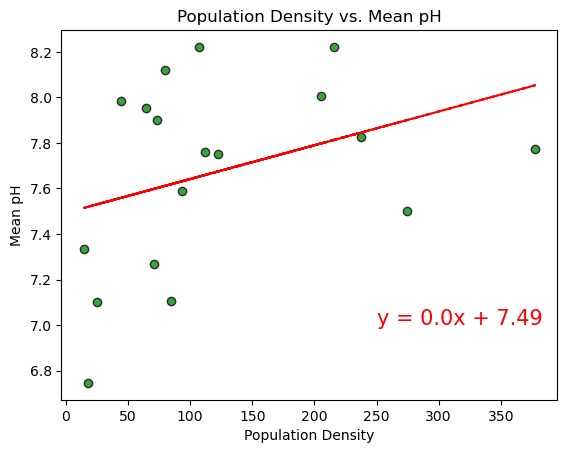

In [7]:
# Build scatter plot with regression line for Population vs Mean pH
x_axis=Country_pH_Stats['Population Density']
y_axis=Country_pH_Stats['Mean pH']
Poss=250, 7
LinReg(x_axis, y_axis, Poss)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
plt.title('Population Density vs. Mean pH')
plt.xlabel('Population Density')
plt.ylabel('Mean pH')
# Save the figure
# plt.savefig("output_data/Pop_MeanpH_ScatterRegression.png")
plt.show()

The r-value is:0.0738574309602054


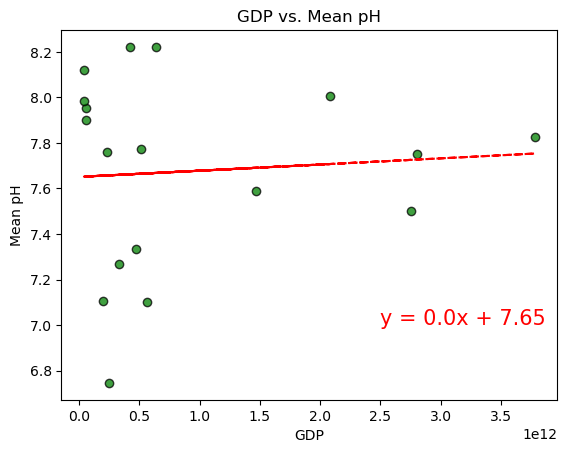

In [8]:
# Build scatter plot with regression line for GDP vs Mean pH
x_axis=Country_pH_Stats['GDP']
y_axis=Country_pH_Stats['Mean pH']
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
Poss=2.5e12, 7
LinReg(x_axis, y_axis, Poss)
plt.title('GDP vs. Mean pH')
plt.xlabel('GDP')
plt.ylabel('Mean pH')
# Save the figure
# plt.savefig("output_data/GDP_MeanpH_ScatterRegression.png")
plt.show()

In [9]:
#Create DF of Stats for Dissolved O2
O2 = CleanData_df['Unit of Measure'] == 'mg{O2}/L'

O2_Stats = CleanData_df[O2].groupby(['Country', 'Year', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
O2_Stats.columns = ['Country', 'Year', 'GDP', 'Population Density', 'Mean O2', 'Median O2', 
                    'O2 Variance', 'O2 Std. Dev.', 'O2 Std. Err.']
O2_Stats.head()

,Country,Year,GDP,Population Density,Mean O2,Median O2,O2 Variance,O2 Std. Dev.,O2 Std. Err.
0,Austria,1992,4.200405e+11,107.127967,5.07000,5.07000,NaN,NaN,NaN
1,Austria,2004,4.200405e+11,107.127967,2.74348,2.74348,NaN,NaN,NaN
2,Austria,2005,4.200405e+11,107.127967,7.05277,7.05277,NaN,NaN,NaN
3,Austria,2006,4.200405e+11,107.127967,3.72750,3.72750,NaN,NaN,NaN
4,Austria,2009,4.200405e+11,107.127967,1.84612,1.84612,0.002856,0.053443,0.03779


In [10]:
#Create DF of Stats for Dissolved O2 - all years combined for each country
O2 = CleanData_df['Unit of Measure'] == 'mg{O2}/L'

Country_O2_Stats = CleanData_df[O2].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_O2_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean O2', 'Median O2', 
                    'O2 Variance', 'O2 Std. Dev.', 'O2 Std. Err.']
Country_O2_Stats

,Country,GDP,Population Density,Mean O2,Median O2,O2 Variance,O2 Std. Dev.,O2 Std. Err.
0,Austria,4.200405e+11,107.127967,3.714332,3.23549,4.181804,2.044946,0.834846
1,Belarus,5.918702e+10,46.719504,1.070000,1.07000,NaN,NaN,NaN
2,Belgium,5.151026e+11,377.379590,5.824079,2.00000,62.172583,7.884959,1.858503
3,Bulgaria,5.679241e+10,64.711100,7.863195,3.68750,68.975917,8.305174,1.081242
4,Croatia,6.109527e+10,73.049375,4.666667,3.50000,10.943333,3.308071,1.909916
5,Czech Republic,2.313405e+11,137.657705,8.975000,3.65415,78.265335,8.846770,3.127805
6,Denmark,3.475197e+11,137.976566,1.318566,1.30169,0.132659,0.364224,0.097343
7,Finland,2.526922e+11,18.148547,12.626858,11.87500,54.154149,7.358950,1.443209
8,France,2.806036e+12,122.299437,3.769420,1.57727,29.186612,5.402463,0.201198
9,Germany,3.781699e+12,237.307597,2.702537,2.40150,3.147974,1.774253,0.273773


The r-value is:-0.31962474407524594


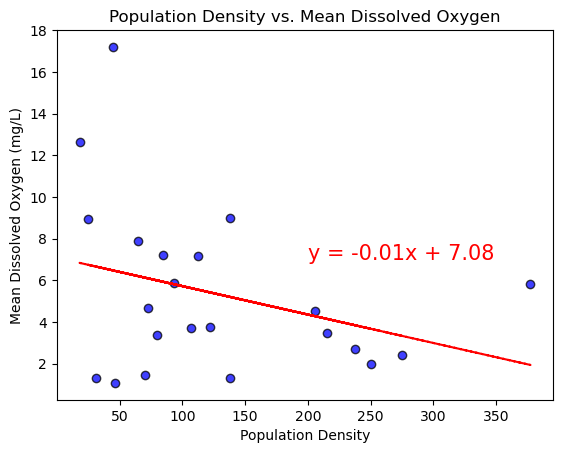

In [11]:
# Build scatter plot with regression line for Population vs Dissolved 0xygen
x_axis=Country_O2_Stats['Population Density']
y_axis=Country_O2_Stats['Mean O2']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
Poss=200, 7
LinReg(x_axis, y_axis, Poss)
plt.title('Population Density vs. Mean Dissolved Oxygen')
plt.xlabel('Population Density')
plt.ylabel('Mean Dissolved Oxygen (mg/L)')
# Save the figure
# plt.savefig("output_data/Pop_MeanO2_ScatterRegression.png")
plt.show()

The r-value is:-0.24116504394765953


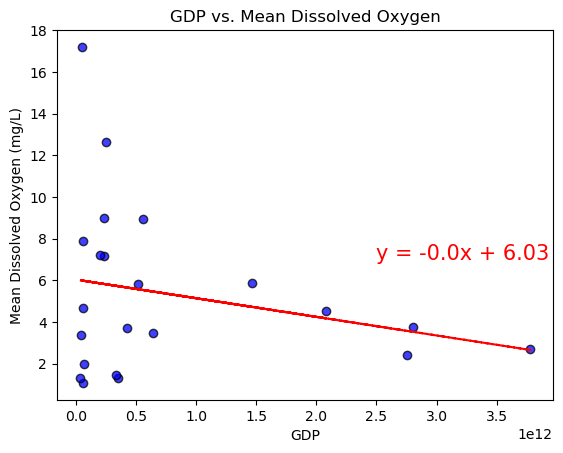

In [12]:
# Build scatter plot with regression line for GDP vs Dissolved 0xygen
x_axis=Country_O2_Stats['GDP']
y_axis=Country_O2_Stats['Mean O2']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
Poss=2.5e12, 7
LinReg(x_axis, y_axis, Poss)
plt.title('GDP vs. Mean Dissolved Oxygen')
plt.xlabel('GDP')
plt.ylabel('Mean Dissolved Oxygen (mg/L)')
# Save the figure
# plt.savefig("output_data/GDP_MeanO2_ScatterRegression.png")
plt.show()

In [13]:
#Create DF of Stats for Temp
Temp = CleanData_df['Unit of Measure'] == 'Cel'

Temp_Stats = CleanData_df[Temp].groupby(['Country', 'Year', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Temp_Stats.columns = ['Country', 'Year', 'GDP', 'Population Density', 'Mean Temp', 'Median Temp', 
                      'Temp Variance', 'Temp Std. Dev.', 'Temp Std. Err.']
Temp_Stats.head()

,Country,Year,GDP,Population Density,Mean Temp,Median Temp,Temp Variance,Temp Std. Dev.,Temp Std. Err.
0,Austria,2010,4.200405e+11,107.127967,10.822500,10.82250,3.112513,1.764231,1.247500
1,Belgium,2009,5.151026e+11,377.379590,11.623625,11.65275,2.920474,1.708939,0.493328
2,Bulgaria,2009,5.679241e+10,64.711100,13.236400,13.17500,5.378266,2.319109,0.518568
3,Bulgaria,2010,5.679241e+10,64.711100,14.656429,14.66000,6.935917,2.633613,0.703863
4,Croatia,2010,6.109527e+10,73.049375,12.800000,12.80000,NaN,NaN,NaN


In [14]:
#Create DF of Stats for Temp- all years combined for each country
Temp = CleanData_df['Unit of Measure'] == 'Cel'

Country_Temp_Stats = CleanData_df[Temp].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_Temp_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean Temp', 'Median Temp', 
                      'Temp Variance', 'Temp Std. Dev.', 'Temp Std. Err.']
Country_Temp_Stats

,Country,GDP,Population Density,Mean Temp,Median Temp,Temp Variance,Temp Std. Dev.,Temp Std. Err.
0,Austria,4.200405e+11,107.127967,10.822500,10.82250,3.112513,1.764231,1.247500
1,Belgium,5.151026e+11,377.379590,11.623625,11.65275,2.920474,1.708939,0.493328
2,Bulgaria,5.679241e+10,64.711100,13.821118,13.84000,6.332130,2.516372,0.431554
3,Croatia,6.109527e+10,73.049375,12.800000,12.80000,NaN,NaN,NaN
4,Finland,2.526922e+11,18.148547,9.736109,8.41035,30.836440,5.553057,0.981651
5,France,2.806036e+12,122.299437,12.083606,12.06250,3.286570,1.812890,0.083981
6,Germany,3.781699e+12,237.307597,12.326872,12.11670,5.030583,2.242896,0.320414
7,Ireland,3.323614e+11,70.653448,9.770577,9.85000,1.128405,1.062264,0.613299
8,Italy,2.080645e+12,205.418372,16.337430,15.84165,4.390951,2.095460,0.662642
9,Latvia,2.887150e+10,30.993471,7.440807,6.98571,7.964277,2.822105,1.066655


The r-value is:-0.02164696688836782


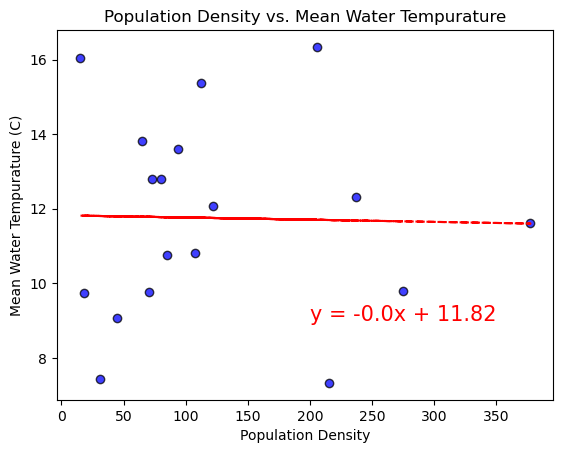

In [15]:
# Build scatter plot with regression line for Population vs Water Temp
x_axis=Country_Temp_Stats['Population Density']
y_axis=Country_Temp_Stats['Mean Temp']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
Poss=200, 9
LinReg(x_axis, y_axis, Poss)
plt.title('Population Density vs. Mean Water Tempurature')
plt.xlabel('Population Density')
plt.ylabel('Mean Water Tempurature (C)')
# Save the figure
# plt.savefig("output_data/Pop_MeanTemp_ScatterRegression.png")
plt.show()

The r-value is:0.15332307101484619


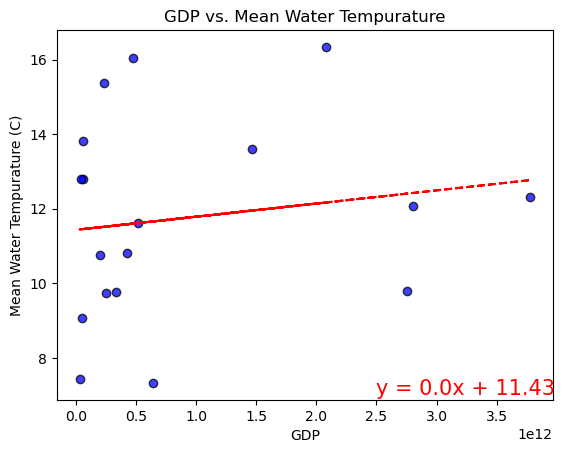

In [16]:
# Build scatter plot with regression line for GDP vs Water Temp
x_axis=Country_Temp_Stats['GDP']
y_axis=Country_Temp_Stats['Mean Temp']
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
Poss=2.5e12, 7
LinReg(x_axis, y_axis, Poss)
plt.title('GDP vs. Mean Water Tempurature')
plt.xlabel('GDP')
plt.ylabel('Mean Water Tempurature (C)')
# Save the figure
# plt.savefig("output_data/GDP_MeanTemp_ScatterRegression.png")
plt.show()

In [17]:
Country_List = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Finland', 
                'France', 'Germany', 'Ireland', 'Italy', 'Latvia', 
                'Lithuania', 'Norway', 'Potrugal', 'Romania', 'Serbia',
                'Switzerland', 'United Kingdom']

In [18]:
#Determine Min and Max pH values
Max_pH=CleanData_df[CleanData_df['Unit of Measure']=='[pH]']["Value"].max()
print(f'Max pH is {Max_pH}.')
Min_pH=CleanData_df[CleanData_df['Unit of Measure']=='[pH]']["Value"].min()
print(f'Minimun pH is {Min_pH}.')


Max pH is 8.6.
Minimun pH is 5.6543.


In [19]:
#Determine Min and Max O2 values
Max_O2=CleanData_df[CleanData_df['Unit of Measure']=='mg{O2}/L/']["Value"].max()
print(f'Max O2 is {Max_O2}.')
Min_O2=CleanData_df[CleanData_df['Unit of Measure']=='mg{O2}/L']["Value"].min()
print(f'Minimun O2 is {Min_O2}.')


Max O2 is nan.
Minimun O2 is 0.2458.


In [20]:
O2_df=CleanData_df.loc[CleanData_df['Unit of Measure']=='mg{O2}/L']
O2Sorted=O2_df.sort_values(by='Value', ascending=False)
O2Sorted.head()

,Unnamed: 0,Country,Water Body ID,Year,Unit of Measure,Value,Population Density,GDP
1641,9175,United Kingdom,UKSC010919,2006,mg{O2}/L,58.5000,274.708982,2.757620e+12
831,4736,Spain,ES13259,2009,mg{O2}/L,57.0000,93.677197,1.464509e+12
1046,5961,Spain,ES030MSPF0408021,2009,mg{O2}/L,53.7500,93.677197,1.464509e+12
1443,8161,Lithuania,LT130110105,2012,mg{O2}/L,45.0833,44.723076,4.573544e+10
3193,17506,Spain,ES030MSPF0717010,2015,mg{O2}/L,44.0250,93.677197,1.464509e+12


In [21]:
#Bins for pH (6.5 to 9 is optimal pH)
pH_bins=[0, 6.5, 9.0]
pH_labels = ["<6.5", "6.5-9.0"]

#Bins for Dissolved O2 (<2mg/l is oxygen deficiency, >6mg/l is optimal)
O2_bins=[0, 2, 6, 58.5]
O2_labels = ['<2 mg/L', '2-6 mg/L', '>6 mg/L']